In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df = pd.read_csv("/content/df_encoded_2")

df.head()

,sexo,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,0,46.224658,2.106849,1,1,1,1,2.0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,29.230137,3.021918,1,0,0,0,2.0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,27.482192,4.024658,1,0,1,0,2.0,0,...,1,1,0,0,0,1,0,0,0,0


In [ ]:
df.columns

Index(['sexo', 'qtd_filhos', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y', 'tipo_renda_Pensioner', 'tipo_renda_State servant',
       'tipo_renda_Student', 'tipo_renda_Working', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Married',
       'estado_civil_Separated', 'estado_civil_Single / not married',
       'estado_civil_Widow', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

In [ ]:
df.mau.value_counts()

# Lembrando que o valor 0 significa um falso,
# enquanto 1 significa verdadeiro. Nesse sentido,
# 1 indica que é mau pagador, enquanto que 0 indica
# que é, por exlusão, bom pagador.

0    6472
1     298
Name: mau, dtype: int64

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
# Separando o conjunto de dados em dois segmentos:
# o target e as porções explicativas. Imagino que o target
# aqui será a variável "mau", que compreende os maus e bons
# pagadores, por exclusão.

# Dados explicativos:
X = df.drop("mau", axis=1)

# Target:
y = df.mau

# Segmentando os dados na sua porção de treino e teste, para cada elemento, x e y:

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [ ]:
# Criando a árvore de decisão:

clf = DecisionTreeClassifier(random_state=100)

# Treinando os dados.

clf = clf.fit(X_train, y_train)

# Prevendo os dados, isto é, a partir do que
# ele "aprendeu" ao treinar, ele irá realizar os testes,
# por meio dos quais chegará a um resultado, que será
# acertar ou não.

y_predict = clf.predict(X_test)

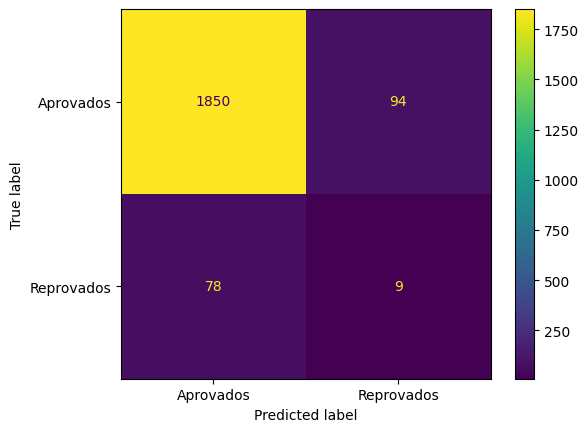

In [ ]:
# Criando a matriz de correlação:

cm = confusion_matrix(y_test, y_predict)

# Visualizando a matriz de correlação:

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aprovados", "Reprovados"])
display.plot()

In [ ]:
# Aferindo a taxa de acerto - acurácia - do modelo.

acuracia = accuracy_score(y_test, y_predict)

print(f"A acurácia foi de: {acuracia}")
print("")
print(f"Se preferir arredondar, a acurácia foi de: {round(acuracia, 2)}")

A acurácia foi de: 0.9153126538650911

Se preferir arredondar, a acurácia foi de: 0.92


[Text(0.6512562060528316, 0.9814814814814815, 'tempo_emprego <= 4.955\ngini = 0.085\nsamples = 4739\nvalue = [4528, 211]\nclass = Died'),
 Text(0.39803811526035726, 0.9444444444444444, 'tempo_emprego <= 4.949\ngini = 0.099\nsamples = 2594\nvalue = [2458, 136]\nclass = Died'),
 Text(0.3949974463131889, 0.9074074074074074, 'posse_de_imovel_Y <= 0.5\ngini = 0.099\nsamples = 2592\nvalue = [2457, 135]\nclass = Died'),
 Text(0.26401558342835424, 0.8703703703703703, 'estado_civil_Widow <= 0.5\ngini = 0.128\nsamples = 815\nvalue = [759, 56]\nclass = Died'),
 Text(0.23764728240212846, 0.8333333333333334, 'tempo_emprego <= 4.647\ngini = 0.117\nsamples = 770\nvalue = [722, 48]\nclass = Died'),
 Text(0.2137970353477765, 0.7962962962962963, 'tipo_residencia_Municipal apartment <= 0.5\ngini = 0.108\nsamples = 733\nvalue = [691, 42]\nclass = Died'),
 Text(0.18738122386925124, 0.7592592592592593, 'tipo_residencia_Office apartment <= 0.5\ngini = 0.099\nsamples = 688\nvalue = [652, 36]\nclass = Died'),


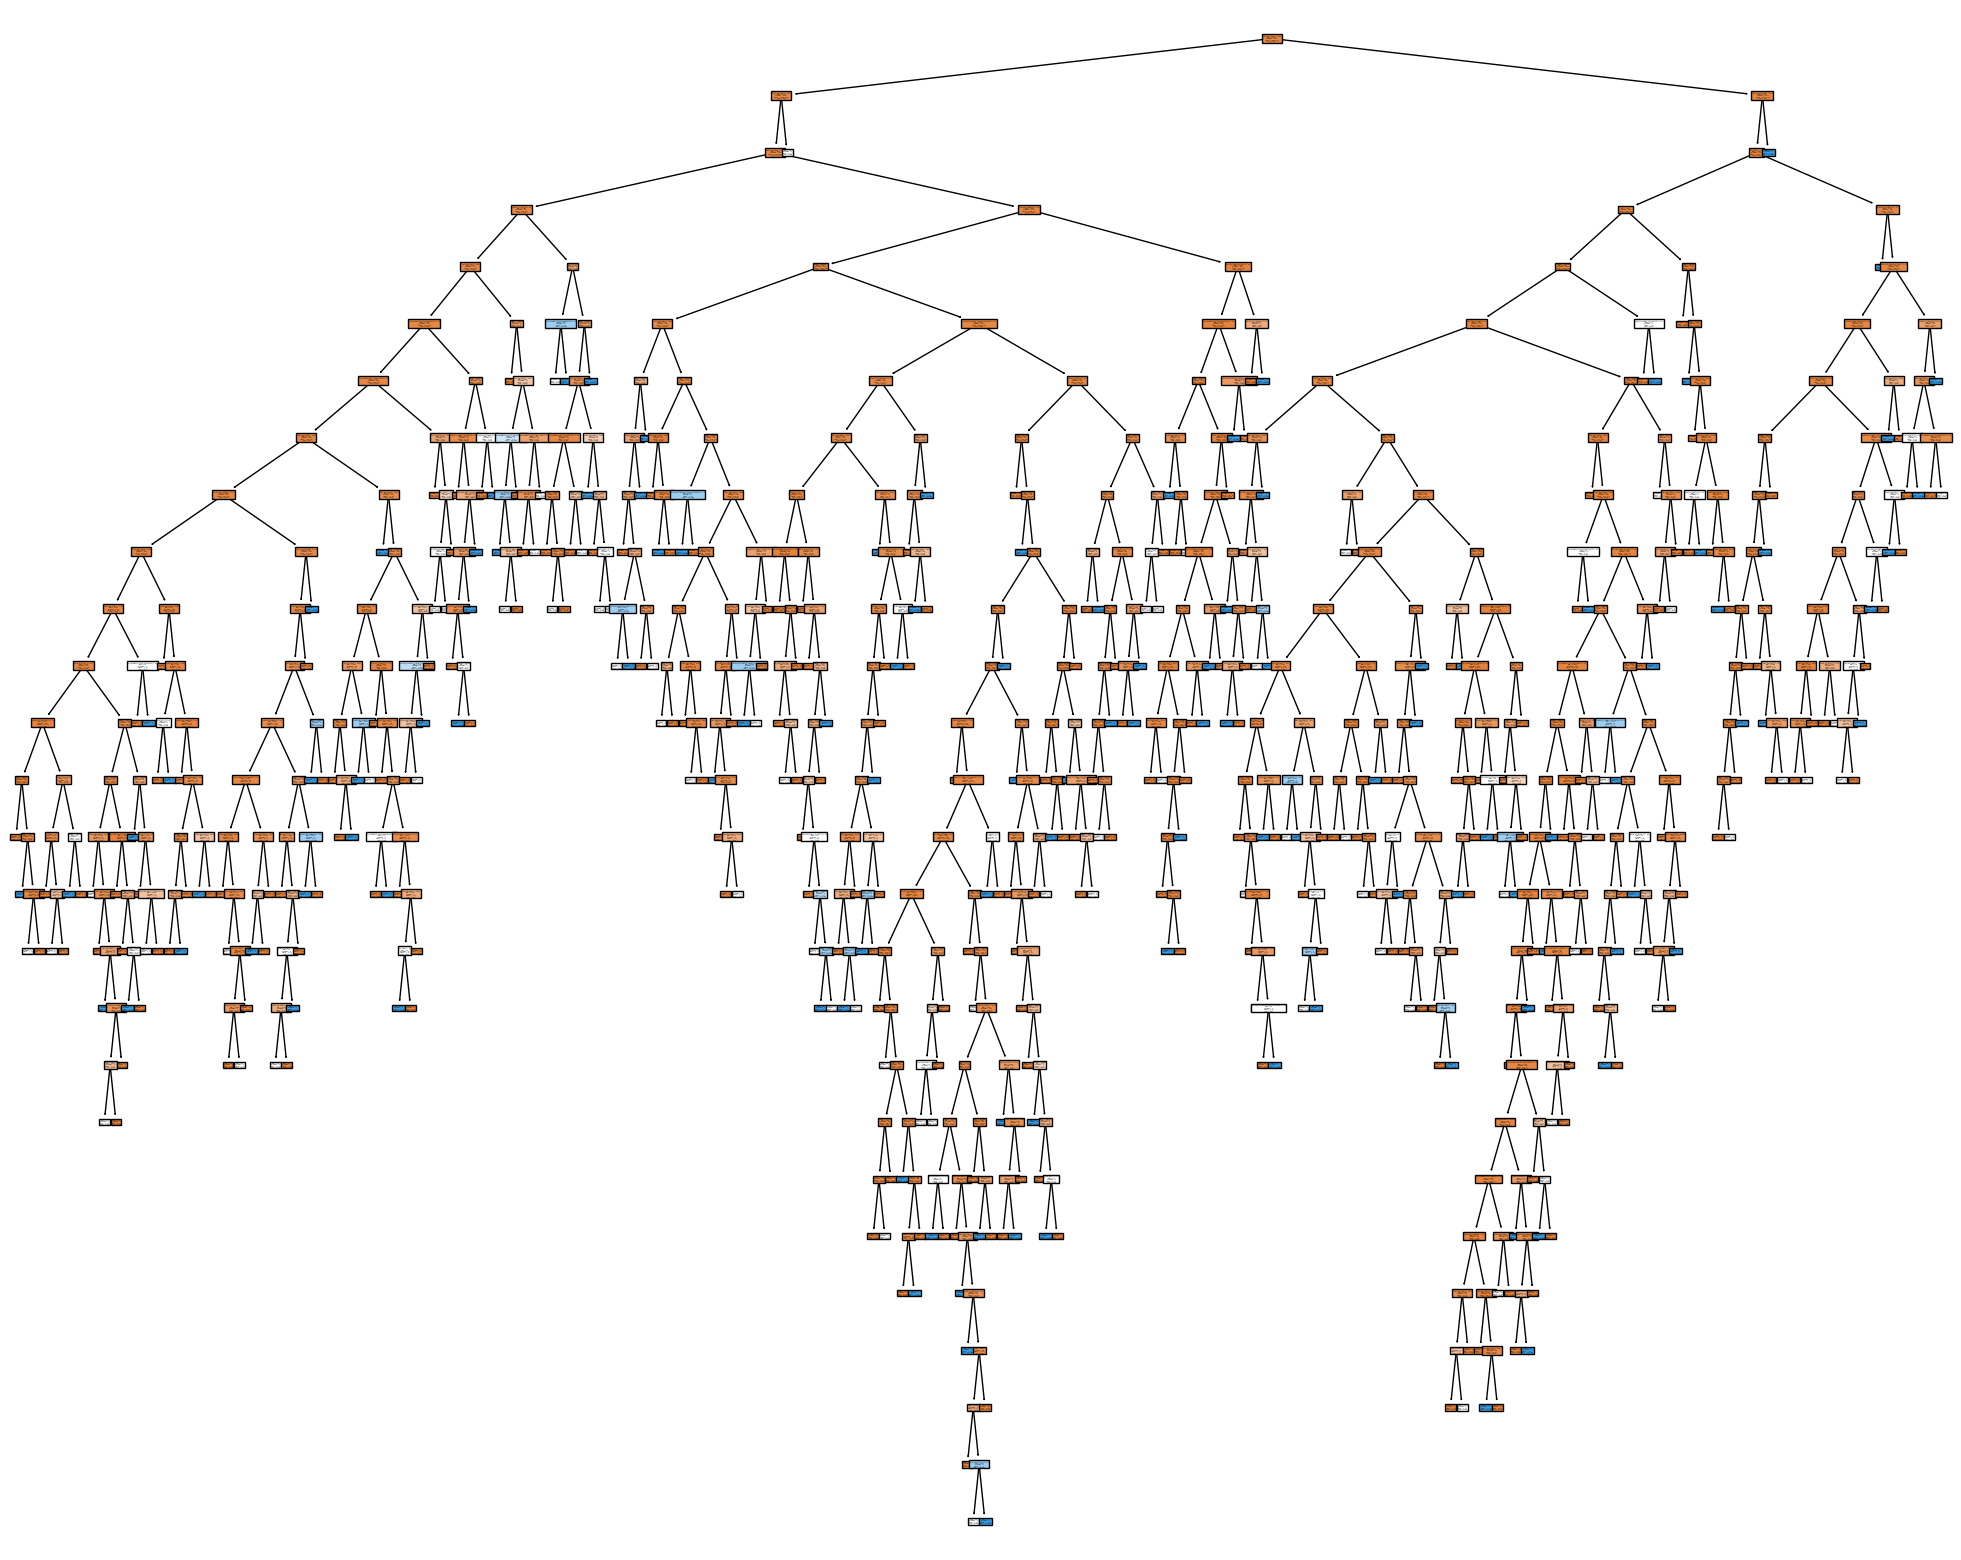

In [ ]:
# Plotando a árvore gerada pelo modelo:

plt.figure(figsize=(25,20))

plot_tree(clf,
         filled=True,
         class_names=["Aprovados", "Reprovados"],
         feature_names=X.columns)

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

**Dúvida:**

Honestamente, não entendi os itens 1 e 2 da questão 3. Perguntei ao GPT, e os exemplos que ele me trouxe, para tanto, foram semelhantes ao o que eu realizei na questão 2. Pode me explicar por favor?

* Item 3:

Para realizar o intem 3 da questão 3, penso que eu deveria realizar o código abaixo. Caso não, que deveria ter sido feito de outro modo, por favor me explique.

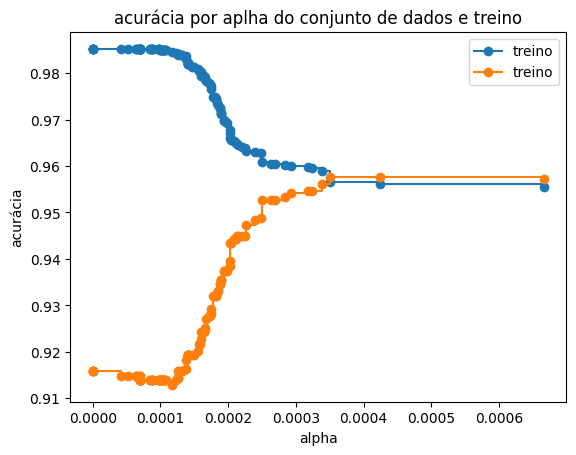

In [ ]:
# Calculando a acurácia de base de teste e de treino:

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.get('ccp_alphas'), path.get('impurities')

clfs = []

for ccp_alpha in ccp_alphas:

  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

# Criando a visualização gráfica que me mostra a dinâmica dos ccp_alphas
# por acurácia de teste ou treino.

train_scores = [clf.score(X_train, y_train) for clf in clfs]
tests_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()

ax.set_xlabel("alpha")
ax.set_ylabel("acurácia")
ax.set_title("acurácia por aplha do conjunto de dados e treino")
ax.plot(ccp_alphas, train_scores, marker="o", label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, tests_scores, marker="o", label="treino",
        drawstyle="steps-post")

ax.legend()
plt.show()


In [ ]:
# Retornando um dataframe que me mostra o valor da acurácia por ccp_aplha utilizado.

pd.DataFrame({"alpha": ccp_alphas.tolist(), "test_scores": tests_scores, "train_scores": train_scores })

# A partir do gráfico gerado, que me permite visualizar, e o dataframe,
# consigo comparar as diferentes pontuações para teste e para treino,
# baseada no modelo criado. Se eu fosse utilizar a técnica de pós-poda,
# eu deveria definir um ccp_alpha de 0.000351, uma vez que é nele que
# as pontuações tanto de treino quanto de testes ficam próximas.

,alpha,test_scores,train_scores
0,0.000000,0.915805,0.985229
1,0.000000,0.915805,0.985229
2,0.000000,0.915805,0.985229
3,0.000000,0.915805,0.985229
4,0.000000,0.915805,0.985229
...,...,...,...
124,0.000324,0.954702,0.959485
125,0.000338,0.956179,0.958852
126,0.000351,0.957656,0.956531
127,0.000425,0.957656,0.956109


* Item 4:

In [ ]:
clf_2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_2 = clf_2.fit(X_train, y_train)
y_predict = clf_2.predict(X_test)

acuracia = accuracy_score(y_test, y_predict)

print(f"A acurácia foi de: {acuracia}.")
print("")
print(f"Se preferir arredondar, a acurácia foi de: {round(acuracia, 2)}.")

A acurácia foi de: 0.9537173806006893.

Se preferir arredondar, a acurácia foi de: 0.95.


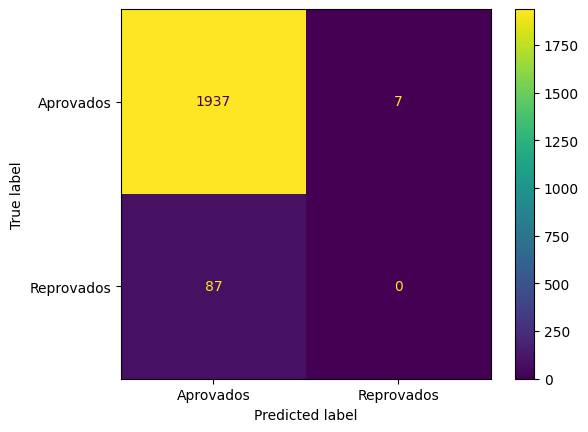

In [ ]:
# Criando a matriz de correlação:

cm = confusion_matrix(y_test, y_predict)

# Visualizando a matriz de correlação:

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aprovados", "Reprovados"])
display.plot()

**Respondendo à questão 4:**

Se o código realizado está correto e a matriz de correlação também, pode-se observar que o modelo definiu um conjunto de 0 maus pagadores, a não ser que  esses são aqueles que ele classificou erroneamente, os quais totalizam 7 maus pagadores.

* Item 5:

Para realizar o item 5 da questão 3 só consegui pensar no uso de um DummyClassifier, então se não era isso que tinha que fazer, me informe na correção.

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
# Crie e treine o DummyClassifier que sempre prevê 'bom pagador':

dummy_model = DummyClassifier(strategy='constant', constant=0)
dummy_model.fit(X_train, y_train)

# Faça previsões nos dados de teste

y_pred = dummy_model.predict(X_test)

# Avaliando a acurácia do modelo dummy:

acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia}')
print("")
print(f'Arredondando acurácia do modelo: {round(acuracia,2)}')

Acurácia do modelo: 0.9571639586410635

Arredondando acurácia do modelo: 0.96


Se o que fiz está correto, pode-se compreender que a acurácia do modelo dummy é próxima ao o modelo utilizado anteriormente, sendo, por outro lado, superior ao primeiro modelo utilizado, que tinha como acurácia uma taxa de 0.92. Isso significa, penso, que devemos pensar num modelo melhor, que consiga superar, a acurácia do modelo dummy.